In [81]:
from keras.utils import image_dataset_from_directory
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [82]:
# import cv2
# import os

# # Define dataset folders
# input_folders = {
#     "test_mask": "./dataset/test/mascarilla",
#     "test_no_mask": "./dataset/test/no_mascarilla",
#     "train_mask": "./dataset/train/mascarilla",
#     "train_no_mask": "./dataset/train/no_mascarilla",
# }

# def resize_images(input_folder, size=(128, 128)):
#     """Resizes all images in a folder to the given size."""
#     for filename in os.listdir(input_folder):
#         if filename.lower().endswith((".jpg", ".png", ".jpeg")):  # Filter valid images
#             image_path = os.path.join(input_folder, filename)
            
#             # Load and validate image
#             image = cv2.imread(image_path)
#             if image is None:
#                 continue  # Skip invalid images

#             # Resize and overwrite image
#             resized_image = cv2.resize(image, size, interpolation=cv2.INTER_LINEAR)
#             cv2.imwrite(image_path, resized_image)

#     print(f"Resizing complete for: {input_folder}")

# # Process all folders
# for folder in input_folders.values():
#     resize_images(folder)

In [83]:
train_dataset = image_dataset_from_directory(
    './dataset/train',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training',
    class_names = ['mascarilla', 'no_mascarilla']
)

test_dataset = image_dataset_from_directory(
    './dataset/test',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=42,
    subset="validation",
    validation_split=0.2,
    class_names = ['mascarilla', 'no_mascarilla']
)

Found 656 files belonging to 2 classes.
Using 525 files for training.
Found 160 files belonging to 2 classes.
Using 32 files for validation.


In [84]:
class_names = train_dataset.class_names
print(class_names)

['mascarilla', 'no_mascarilla']


In [85]:
# Normalización
autotune = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=autotune)
test_dataset = test_dataset.prefetch(buffer_size=autotune)

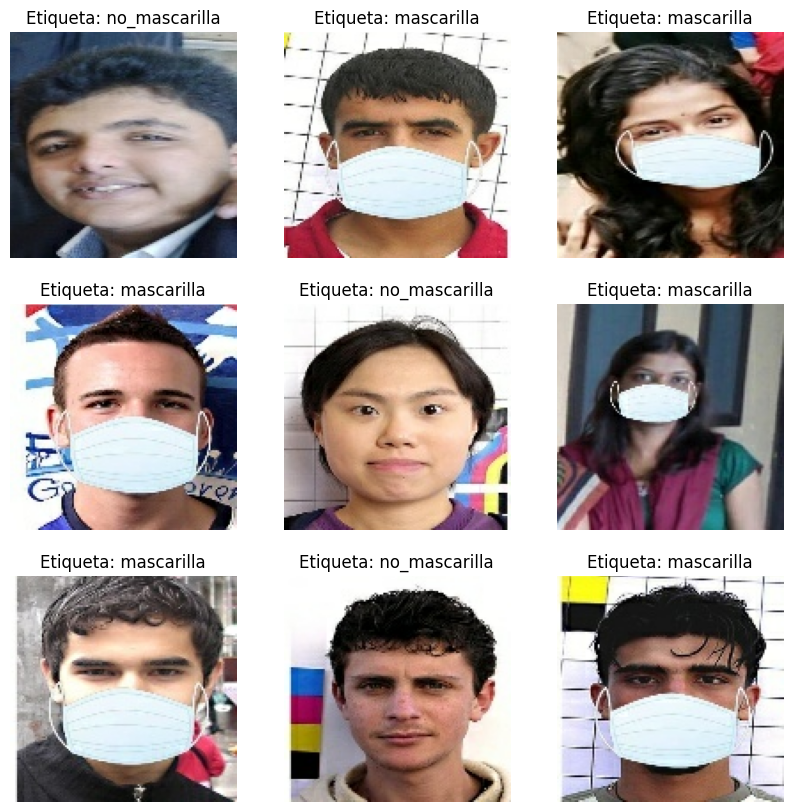

In [86]:

class_names = ['mascarilla', 'no_mascarilla']
for images, labels in train_dataset.take(1):  
    images = images.numpy().astype("uint8")  
    labels = labels.numpy() 

    # Mostrar las primeras 9 imágenes
    plt.figure(figsize=(10, 10))
    for i in range(min(9, len(images))):  
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])  
        plt.title(f"Etiqueta: {class_names[int(labels[i])]}")
        plt.axis("off")
    plt.show()
    break

In [87]:
# Obtener un batch del dataset
for images, labels in train_dataset.take(1):  # Toma el primer batch
    print("Shape de las imágenes:", images.shape)  # Shape de las imágenes
    print("Shape de las etiquetas:", labels.shape)

Shape de las imágenes: (32, 128, 128, 3)
Shape de las etiquetas: (32, 1)


In [88]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU


In [89]:
import tensorflow as tf
from tensorflow.keras import layers

# Definir el bloque de Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.2)
])

# Aplicar Data Augmentation al dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

In [90]:
batch_size = 32
epochs = 20
num_classes = 2

In [ ]:
clasification_model = Sequential()
clasification_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
clasification_model.add(MaxPooling2D((2, 2)))

clasification_model.add(Conv2D(64, (3, 3), activation='relu'))
clasification_model.add(MaxPooling2D((2, 2)))

clasification_model.add(Conv2D(128, (3, 3), activation='relu'))
clasification_model.add(MaxPooling2D((2, 2)))
clasification_model.add(Dropout(0.25))

clasification_model.add(Flatten())
clasification_model.add(Dense(64, activation="relu"))
clasification_model.add(Dropout(0.5))
clasification_model.add(Dense(1, activation="sigmoid"))

In [92]:
clasification_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
clasification_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 128)      

In [93]:
clasification_train = clasification_model.fit(train_dataset, batch_size=batch_size, epochs=epochs, validation_data=test_dataset )

Epoch 1/20
17/17 [==============================] - 10s 456ms/step - loss: 42.5233 - accuracy: 0.5562 - val_loss: 0.5895 - val_accuracy: 0.7500
Epoch 2/20
17/17 [==============================] - 6s 352ms/step - loss: 0.4737 - accuracy: 0.8095 - val_loss: 0.3944 - val_accuracy: 0.8438
Epoch 3/20
17/17 [==============================] - 6s 345ms/step - loss: 0.3719 - accuracy: 0.8514 - val_loss: 0.1838 - val_accuracy: 0.9375
Epoch 4/20
17/17 [==============================] - 6s 366ms/step - loss: 0.2339 - accuracy: 0.9029 - val_loss: 0.1221 - val_accuracy: 0.9688
Epoch 5/20
17/17 [==============================] - 7s 388ms/step - loss: 0.2227 - accuracy: 0.9143 - val_loss: 0.0488 - val_accuracy: 0.9688
Epoch 6/20
17/17 [==============================] - 6s 366ms/step - loss: 0.1781 - accuracy: 0.9410 - val_loss: 0.0721 - val_accuracy: 0.9688
Epoch 7/20
17/17 [==============================] - 6s 355ms/step - loss: 0.1992 - accuracy: 0.9314 - val_loss: 0.1082 - val_accuracy: 0.9375
Epoc

1/1 [==============================] - 0s 169ms/step
Classification Report:
               precision    recall  f1-score   support

   mascarilla       0.43      0.43      0.43        14
no_mascarilla       0.56      0.56      0.56        18

     accuracy                           0.50        32
    macro avg       0.49      0.49      0.49        32
 weighted avg       0.50      0.50      0.50        32



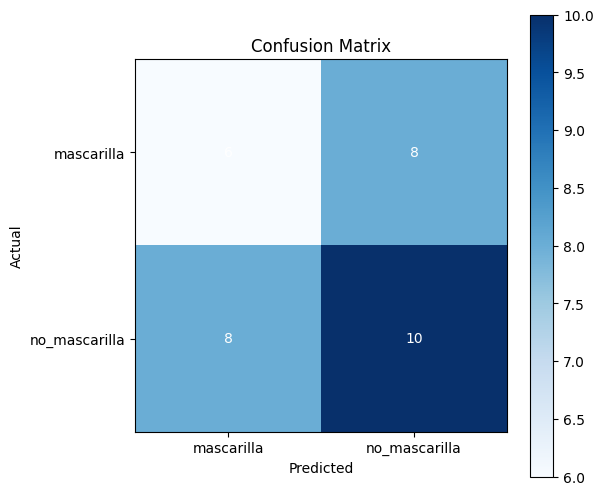

In [98]:
# Evaluar modelo
y_true = np.concatenate([y for x, y in test_dataset], axis=0)
y_pred = clasification_model.predict(test_dataset)
y_pred = (y_pred > 0.5).astype(int).flatten()

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['mascarilla', 'no_mascarilla']))

# Matriz de confusión
classes = ['mascarilla', 'no_mascarilla']
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(cm, cmap='Blues', interpolation='nearest')

# Agregar los números dentro de las celdas
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='white')

plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0, 1], labels=['mascarilla', 'no_mascarilla'])
plt.yticks(ticks=[0, 1], labels=['mascarilla', 'no_mascarilla'])
plt.title('Confusion Matrix')
plt.show()